### Importación de datos



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



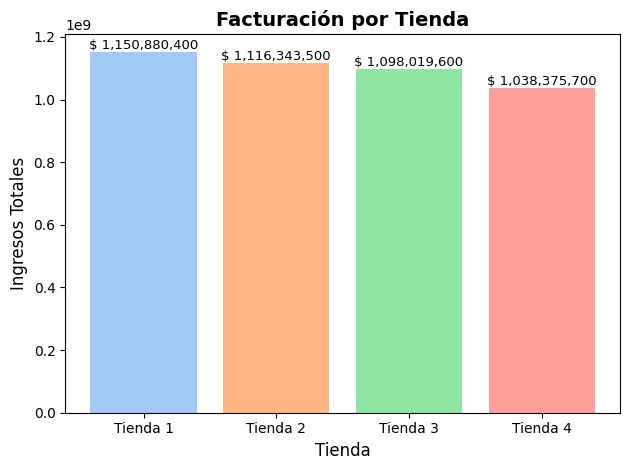

In [89]:
def ingresos_por_tienda(tienda):
  return tienda['Precio'].sum()

# print(f'Ingresos Tienda 1: $ {ingresos_por_tienda(tienda1)}')
# print(f'Ingresos Tienda 2: $ {ingresos_por_tienda(tienda2)}')
# print(f'Ingresos Tienda 3: $ {ingresos_por_tienda(tienda3)}')
# print(f'Ingresos Tienda 4: $ {ingresos_por_tienda(tienda4)}')

ingresos = [ingresos_por_tienda(tienda1), ingresos_por_tienda(tienda2), ingresos_por_tienda(tienda3), ingresos_por_tienda(tienda4)]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = sns.color_palette('pastel', n_colors=len(tiendas))
barras = plt.bar(tiendas, ingresos, color=colores)

for barra, ingreso in zip(barras, ingresos):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'$ {ingreso:,.0f}', ha='center', va='bottom', fontsize=9.5)

plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)
plt.title('Facturación por Tienda', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

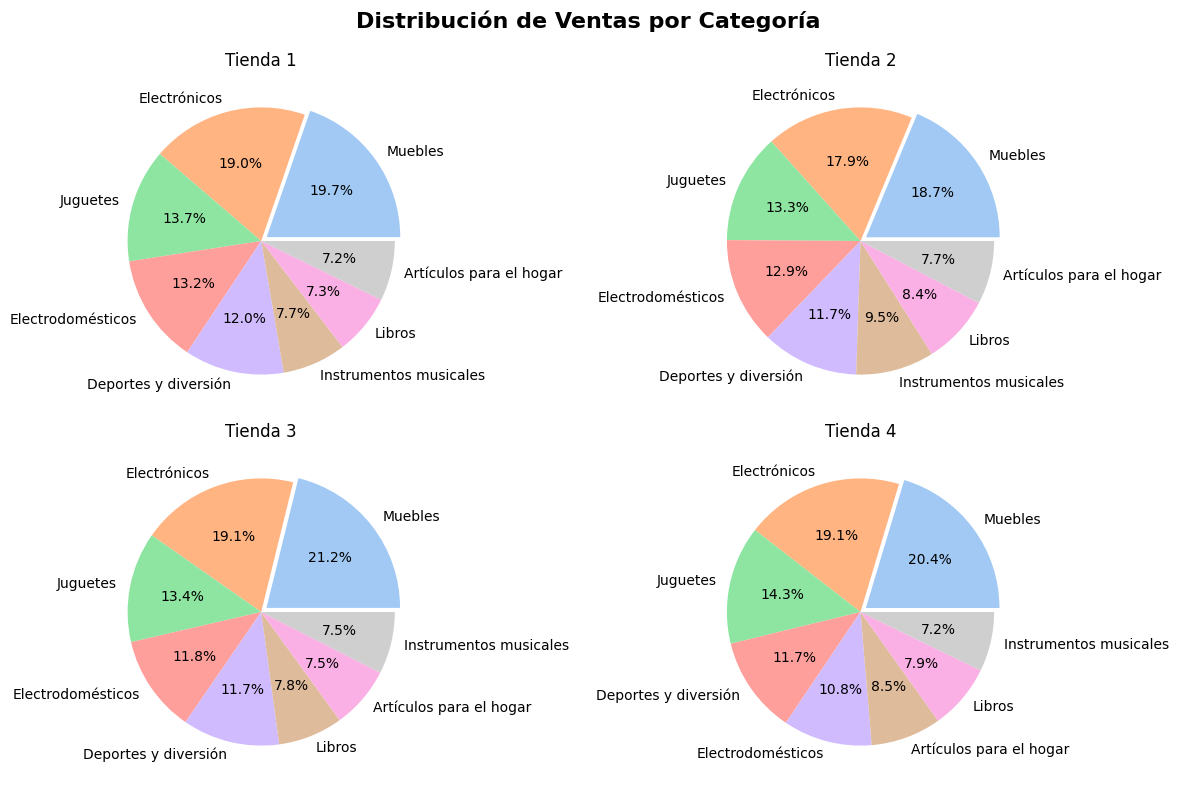

In [90]:
def ventas_por_categoria(tienda):
  return tienda.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values(ascending=False)

ventas_tienda1 = ventas_por_categoria(tienda1)
ventas_tienda2 = ventas_por_categoria(tienda2)
ventas_tienda3 = ventas_por_categoria(tienda3)
ventas_tienda4 = ventas_por_categoria(tienda4)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colores = sns.color_palette('pastel', n_colors=len(ventas_tienda1))

# Gráfico Tienda 1
ventas_tienda1.plot(kind='pie', ax=axes[0, 0], autopct='%1.1f%%', colors=colores,
                     textprops={'fontsize': 10}, explode=[0.05, 0, 0, 0, 0, 0, 0, 0])
axes[0, 0].set_ylabel('')
axes[0, 0].set_title('Tienda 1', fontsize=12)

# Gráfico Tienda 2
ventas_tienda2.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', colors=colores,
                     textprops={'fontsize': 10}, explode=[0.05, 0, 0, 0, 0, 0, 0, 0])
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Tienda 2', fontsize=12)

# Gráfico Tienda 3
ventas_tienda3.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', colors=colores,
                     textprops={'fontsize': 10}, explode=[0.05, 0, 0, 0, 0, 0, 0, 0])
axes[1, 0].set_ylabel('')
axes[1, 0].set_title('Tienda 3', fontsize=12)

# Gráfico Tienda 4
ventas_tienda4.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', colors=colores,
                     textprops={'fontsize': 10}, explode=[0.05, 0, 0, 0, 0, 0, 0, 0])
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Tienda 4', fontsize=12)

fig.suptitle('Distribución de Ventas por Categoría', fontsize=16, fontweight='bold')  # Título general

plt.tight_layout()
plt.subplots_adjust(top=0.9) # Ajustar espacio para el título general
plt.show()

# 3. Calificación promedio de la tienda


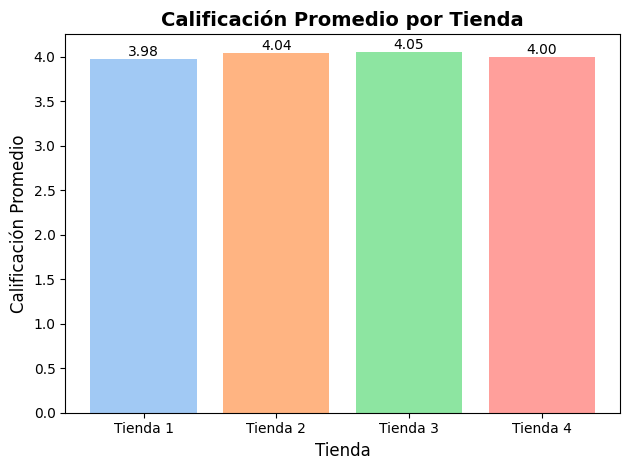

In [91]:
def calificacion_promedio(tienda):
  suma = 0
  for calificacion in tienda['Calificación']:
    suma += calificacion
  return suma / len(tienda['Calificación'])

calificaciones = [calificacion_promedio(tienda1), calificacion_promedio(tienda2), calificacion_promedio(tienda3), calificacion_promedio(tienda4)]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = sns.color_palette('pastel', n_colors=len(tiendas))
barras = plt.bar(tiendas, calificaciones, color=colores)

for barra, calificacion in zip(barras, calificaciones):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'{calificacion:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.title('Calificación Promedio por Tienda', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

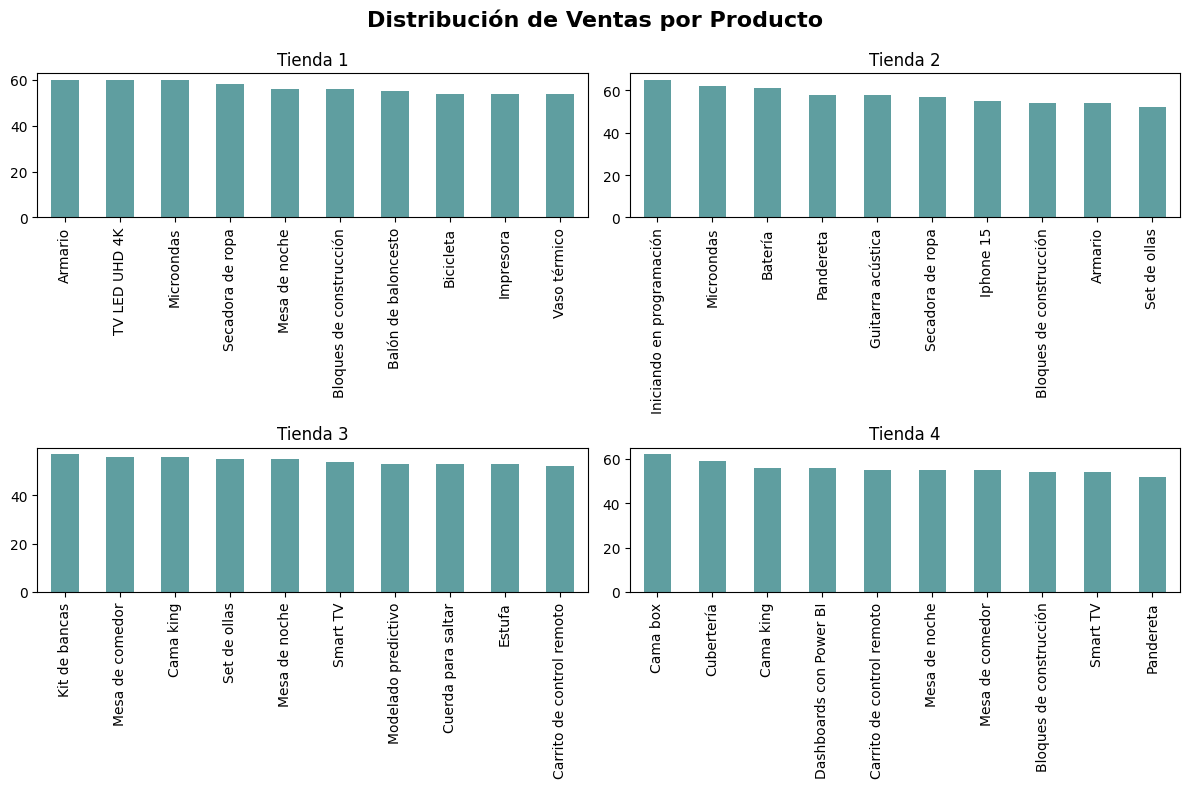

In [92]:
def ventas_por_producto(tienda, top_n=10):
  return tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False).head(top_n)

mas_vendidos_tienda1 = ventas_por_producto(tienda1)
mas_vendidos_tienda2 = ventas_por_producto(tienda2)
mas_vendidos_tienda3 = ventas_por_producto(tienda3)
mas_vendidos_tienda4 = ventas_por_producto(tienda4)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

mas_vendidos_tienda1.plot(kind='bar', ax=axes[0, 0], title='Tienda 1', color=['cadetblue'])
axes[0, 0].set_xlabel('')
mas_vendidos_tienda2.plot(kind='bar', ax=axes[0, 1], title='Tienda 2', color=['cadetblue'])
axes[0, 1].set_xlabel('')
mas_vendidos_tienda3.plot(kind='bar', ax=axes[1, 0], title='Tienda 3', color=['cadetblue'])
axes[1, 0].set_xlabel('')
mas_vendidos_tienda4.plot(kind='bar', ax=axes[1, 1], title='Tienda 4', color=['cadetblue'])
axes[1, 1].set_xlabel('')

fig.suptitle('Distribución de Ventas por Producto', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

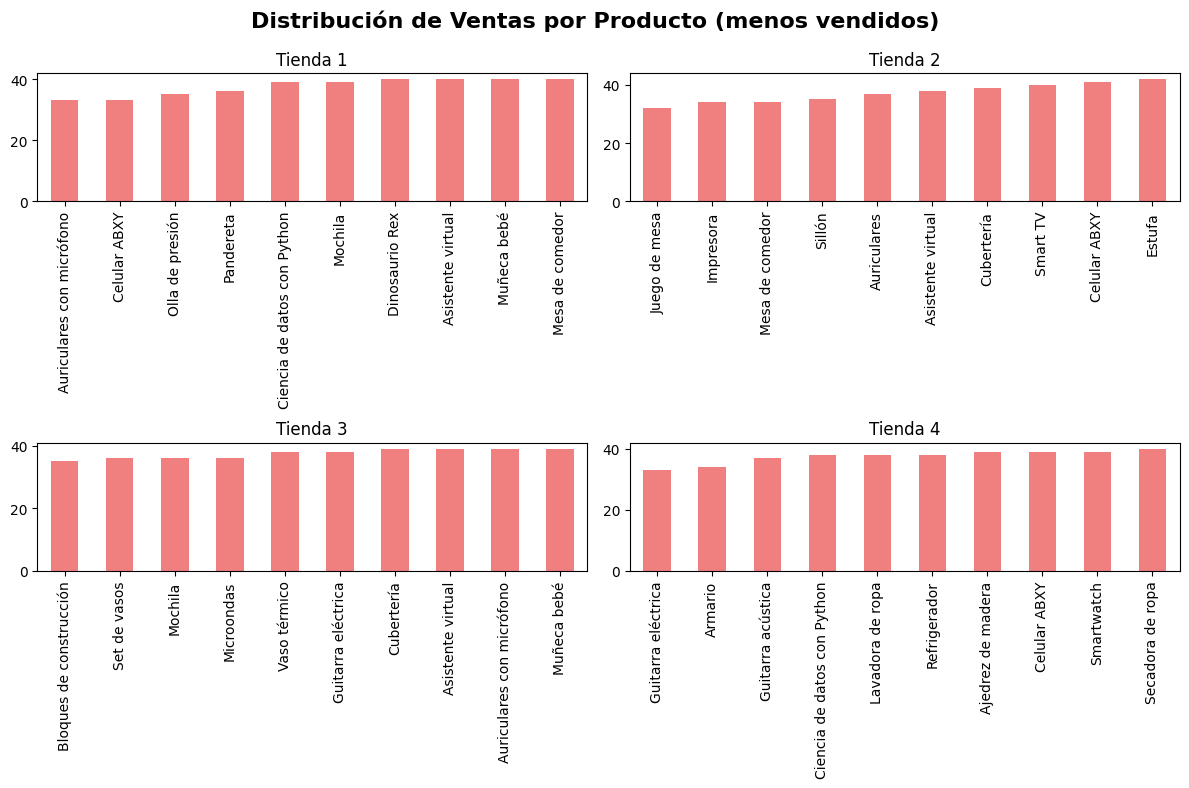

In [93]:
def productos_menos_vendidos(tienda, top_n=10):
  return tienda.groupby('Producto')['Producto'].count().sort_values(ascending=True).head(top_n)

menos_vendidos_tienda1 = productos_menos_vendidos(tienda1)
menos_vendidos_tienda2 = productos_menos_vendidos(tienda2)
menos_vendidos_tienda3 = productos_menos_vendidos(tienda3)
menos_vendidos_tienda4 = productos_menos_vendidos(tienda4)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

menos_vendidos_tienda1.plot(kind='bar', ax=axes[0, 0], title='Tienda 1', color=['lightcoral'])
axes[0, 0].set_xlabel('')
menos_vendidos_tienda2.plot(kind='bar', ax=axes[0, 1], title='Tienda 2', color=['lightcoral'])
axes[0, 1].set_xlabel('')
menos_vendidos_tienda3.plot(kind='bar', ax=axes[1, 0], title='Tienda 3', color=['lightcoral'])
axes[1, 0].set_xlabel('')
menos_vendidos_tienda4.plot(kind='bar', ax=axes[1, 1], title='Tienda 4', color=['lightcoral'])
axes[1, 1].set_xlabel('')

fig.suptitle('Distribución de Ventas por Producto (menos vendidos)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 5. Envío promedio por tienda

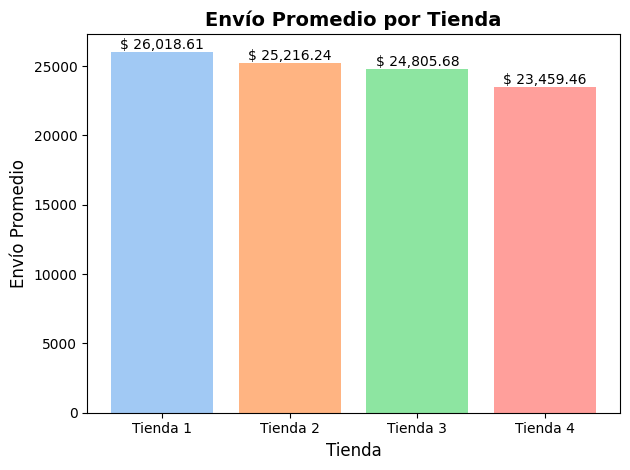

In [94]:
def envio_promedio(tienda):
  suma = 0
  for envio in tienda['Costo de envío']:
    suma += envio
  return suma / len(tienda['Costo de envío'])

# print(f'Envío promedio Tienda 1: $ {round(envio_promedio(tienda1),2)}')
# print(f'Envío promedio Tienda 2: $ {round(envio_promedio(tienda2),2)}')
# print(f'Envío promedio Tienda 3: $ {round(envio_promedio(tienda3),2)}')
# print(f'Envío promedio Tienda 4: $ {round(envio_promedio(tienda4),2)}')

envios = [envio_promedio(tienda1), envio_promedio(tienda2), envio_promedio(tienda3), envio_promedio(tienda4)]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = sns.color_palette('pastel', n_colors=len(tiendas))
barras = plt.bar(tiendas, envios, color=colores)

for barra, envio in zip(barras, envios):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'$ {envio:,.2f}', ha='center', va='bottom')

plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Envío Promedio', fontsize=12)
plt.title('Envío Promedio por Tienda', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. Conclusión y recomendaciones finales

A partir de los datos analizados se puede decir que:

* La Tienda 1 lidera en ingresos y a su vez tiene la calificación más baja por parte de los clientes. Se debería realizar un análisis más exhaustivo para encontrar las causas de la baja satisfacción de los clientes, ya que puede perjudicar al nivel de ventas.

* La Tienda 2 se encuentra en segundo lugar de ventas y de satisfacción de los clientes, por lo que se podría decir que se trata de la más estable de las cuatro tiendas.

* La Tienda 3 es la mejor calificada por los clientes. Este puede resultar un factor importante para evaluar y aplicar mejoras en las demás tiendas. En cuanto al nivel de facturación habría que estudiar a qué se debe su nivel inferior a las tiendas 1 y 2.

* La Tienda 4 presenta la facturación más baja, además de una baja performance en cuanto a la calificación de los clientes. Por lo tanto, es la tienda a la cual se le debería prestar mayor atención.

* En cuanto a la venta por categorías, ésta se encuentra distribuida de manera similar en las cuatro tiendas. No resulta un factor determinante para evaluar la tienda a vender. Sin embargo, se podrían examinar las categorías menos vendidas y considerar dentro de éstas los productos que generen mejores ingresos para finalmente envaluar si conviene mantenerlos o redistribuir el enfoque en las categorías más fuertes.

* Al observar los productos más vendidos, en general pertenecen a las categorías 'Muebles' y 'Electrónicos'. No obstante, algunos de los productos corresponden a categorías menos vendidas como 'Instrumentos Musicales'. Por ello, se debería tener en cuenta el punto anterior y reevaluar la situación de determinados productos. En general, se debería indagar con mayor profundidad en las ventas por producto y categorías y en los niveles de facturación con el fin de potenciar la venta de algunos productos que podrían generar mayores ingresos y discontinuar otros.

* Con respecto a los costos de envío, se puede observar que se encuentran en relación directa con la facturación de cada tienda. Debería realizarse un estudio más minucioso en lo que respecta a logística, ya que esto puede repercutir de forma directa en los márgenes de ganancia y en la calificación por parte de los clientes.

En conclusión, teniendo en cuenta los puntos anteriores consido como factores principales para la decisión de venta los ingresos por tienda y la calificación de los clientes. Por ello, recomiendo vender la Tienda 4 porque presenta los indicadores más bajos en general.




